<a href="https://colab.research.google.com/github/kesireddysiva/Sivanarayana_INFO_5737_Spring_2024/blob/main/Sivanarayana_Reddy_Kesireddy5731_Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB  # Add this import
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from gensim.models import Word2Vec
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
import torch

# Load the training data
train_data = pd.read_csv('/content/stsa-train.txt', sep='\t', header=None, names=['label_text'])

# Split the 'label_text' column into 'label' and 'text'
train_data[['label', 'text']] = train_data['label_text'].str.split(' ', n=1, expand=True)

# Drop the 'label_text' column
train_data.drop(columns=['label_text'], inplace=True)

# Convert 'label' column to integers
train_data['label'] = train_data['label'].astype(int)

# Preprocess the text data
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(train_data['text'])
y_train = train_data['label']

# Split the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_tfidf, y_train, test_size=0.2, random_state=42)

# Load the test data
test_data = pd.read_csv('/content/stsa-test.txt', sep='\t', header=None, names=['label_text'])
# Split the 'label_text' column into 'label' and 'text'
test_data[['label', 'text']] = test_data['label_text'].str.split(' ', n=1, expand=True)

# Drop the 'label_text' column
test_data.drop(columns=['label_text'], inplace=True)

# Convert 'label' column to integers
test_data['label'] = test_data['label'].astype(int)



# Define the algorithms
algorithms = [
    ('MultinomialNB', MultinomialNB()),
    ('SVM', SVC()),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('XGBoost', XGBClassifier())
]

# Perform evaluation on the validation set for all algorithms
for name, algorithm in algorithms:
    print(f"Algorithm: {name}")
    algorithm.fit(X_train, y_train)
    y_val_pred = algorithm.predict(X_val)

    acc_val = accuracy_score(y_val, y_val_pred)
    rec_val = recall_score(y_val, y_val_pred, average='macro')
    prec_val = precision_score(y_val, y_val_pred, average='macro')
    f1_val = f1_score(y_val, y_val_pred, average='macro')
    print(f"Validation Accuracy: {acc_val:.3f}")
    print(f"Validation Recall: {rec_val:.3f}")
    print(f"Validation Precision: {prec_val:.3f}")
    print(f"Validation F1-Score: {f1_val:.3f}")
    print()

# Transform test data using the same vectorizer
X_test_tfidf = vectorizer.transform(test_data['text'])

# Evaluation on the test data for all algorithms
for name, algorithm in algorithms:
    print(f"Test Metrics for {name}:")
    # For other algorithms
    y_test_pred = algorithm.predict(X_test_tfidf)

    acc_test = accuracy_score(test_data['label'], y_test_pred)
    rec_test = recall_score(test_data['label'], y_test_pred, average='macro')
    prec_test = precision_score(test_data['label'], y_test_pred, average='macro')
    f1_test = f1_score(test_data['label'], y_test_pred, average='macro')
    print(f"Test Accuracy: {acc_test:.3f}")
    print(f"Test Recall: {rec_test:.3f}")
    print(f"Test Precision: {prec_test:.3f}")
    print(f"Test F1-Score: {f1_test:.3f}")
    print()



Algorithm: MultinomialNB
Validation Accuracy: 0.797
Validation Recall: 0.794
Validation Precision: 0.808
Validation F1-Score: 0.794

Algorithm: SVM
Validation Accuracy: 0.798
Validation Recall: 0.796
Validation Precision: 0.802
Validation F1-Score: 0.796

Algorithm: KNN
Validation Accuracy: 0.728
Validation Recall: 0.726
Validation Precision: 0.730
Validation F1-Score: 0.726

Algorithm: Decision Tree
Validation Accuracy: 0.616
Validation Recall: 0.615
Validation Precision: 0.616
Validation F1-Score: 0.615

Algorithm: Random Forest
Validation Accuracy: 0.723
Validation Recall: 0.720
Validation Precision: 0.728
Validation F1-Score: 0.719

Algorithm: XGBoost
Validation Accuracy: 0.713
Validation Recall: 0.710
Validation Precision: 0.720
Validation F1-Score: 0.709

Test Metrics for MultinomialNB:
Test Accuracy: 0.802
Test Recall: 0.802
Test Precision: 0.812
Test F1-Score: 0.801

Test Metrics for SVM:
Test Accuracy: 0.799
Test Recall: 0.799
Test Precision: 0.801
Test F1-Score: 0.799

Test M

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from transformers import BertTokenizer, BertModel
import torch
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Downloading necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

stopwords_list = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

train_df = pd.read_csv('stsa-train.txt', sep='delimiter=', header=None, names=['reviews'])
train_df[['label', 'reviews']] = train_df['reviews'].str.split(" ", n=1, expand=True)

test_df = pd.read_csv('stsa-test.txt', sep='delimiter=', header=None, names=['reviews'])
test_df[['label', 'reviews']] = test_df['reviews'].str.split(" ", n=1, expand=True)

def preprocess_review(review):
    # Convert to lowercase and remove punctuation
    review = "".join([word.lower() for word in review if word not in string.punctuation])
    # Remove digits
    review = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", review)
    # Tokenize and lemmatize
    tokens = re.split('\W+', review)
    processed_review = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords_list]
    return ' '.join(processed_review)

train_df['clean_reviews'] = train_df['reviews'].apply(preprocess_review)
test_df['clean_reviews'] = test_df['reviews'].apply(preprocess_review)

# Converting the 'sentiment' to numerical format
label_encoder = LabelEncoder()
train_df['label'] = label_encoder.fit_transform(train_df['label'])
test_df['label'] = label_encoder.transform(test_df['label'])

# 10 Fold cross validations

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(train_df['clean_reviews'])
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

X_test_tfidf = tfidf_vectorizer.transform(test_df['clean_reviews'])

def assess_classifier_performance(classifier, classifier_name, X_train, y_train, X_test, y_test, cv=10):
    # Printing the results for the classifier
    print(f"\nResults for {classifier_name}:\n")
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    # Printing accuracy and classification report
    print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))
    print(classification_report(y_test, y_pred))

    # Printing Cross-validation scores
    scores = cross_val_score(classifier, X_test, y_test, cv=cv, scoring='accuracy')
    print("Cross-Validation Mean Score : {:.2f}%".format(scores.mean() * 100))

# Function to average word vectors for a document
def calculate_average_word_vectors(words, model, num_features):
    # Calculate the average word vectors
    feature_vector = np.zeros((num_features,), dtype="float64")
    n_words = 0.

    for word in words:
        if word in model.wv.key_to_index:
            n_words += 1.
            feature_vector = np.add(feature_vector, model.wv[word])

    if n_words:
        feature_vector = np.divide(feature_vector, n_words)

    return feature_vector

# Word2Vec
tokenized_reviews = [review.split() for review in train_df['clean_reviews']]
word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

# Vectorizing train and test data using Word2Vec
num_features = 100
train_df['word2vec_features'] = train_df['clean_reviews'].apply(
    lambda x: calculate_average_word_vectors(x, word2vec_model, num_features)
)
test_df['word2vec_features'] = test_df['clean_reviews'].apply(
    lambda x: calculate_average_word_vectors(x, word2vec_model, num_features)
)

# Model training and evaluation with Word2Vec using SVM
svm_word2vec = SVC()
assess_classifier_performance(svm_word2vec, "SVM with Word2Vec", np.vstack(train_df['word2vec_features']), train_df['label'],
                               np.vstack(test_df['word2vec_features']), test_df['label'])

# BERT
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

def tokenize_for_bert(review):
    # Tokenize for BERT
    tokens = bert_tokenizer.encode_plus(review, add_special_tokens=True, truncation=True, max_length=512, return_tensors='pt')
    return tokens['input_ids']

train_df['bert_tokens'] = train_df['clean_reviews'].apply(tokenize_for_bert)
test_df['bert_tokens'] = test_df['clean_reviews'].apply(tokenize_for_bert)

# Function to get BERT embeddings
def get_bert_embeddings(tokens):
    with torch.no_grad():
        outputs = bert_model(tokens)
    return outputs['last_hidden_state'].mean(dim=1).squeeze().numpy()

# Apply BERT embeddings to train and test data
train_df['bert_features'] = train_df['bert_tokens'].apply(get_bert_embeddings)
test_df['bert_features'] = test_df['bert_tokens'].apply(get_bert_embeddings)

# Model training and evaluation with BERT using SVM
svm_bert = SVC()
assess_classifier_performance(svm_bert, "SVM with BERT", np.vstack(train_df['bert_features']), train_df['label'],
                               np.vstack(test_df['bert_features']), test_df['label'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-8-d04cc675f7b5>:22: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_df = pd.read_csv('stsa-train.txt', sep='delimiter=', header=None, names=['reviews'])
<ipython-input-8-d04cc675f7b5>:25: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_df = pd.read_csv('stsa-test.txt', sep='delimiter=', header=None, names=['reviews'])



Results for SVM with Word2Vec:

Accuracy: 51.51%
              precision    recall  f1-score   support

           0       0.61      0.09      0.15       912
           1       0.51      0.94      0.66       909

    accuracy                           0.52      1821
   macro avg       0.56      0.52      0.41      1821
weighted avg       0.56      0.52      0.41      1821

Cross-Validation Mean Score : 52.67%

Results for SVM with BERT:

Accuracy: 79.30%
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       912
           1       0.78      0.81      0.80       909

    accuracy                           0.79      1821
   macro avg       0.79      0.79      0.79      1821
weighted avg       0.79      0.79      0.79      1821

Cross-Validation Mean Score : 77.10%


## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


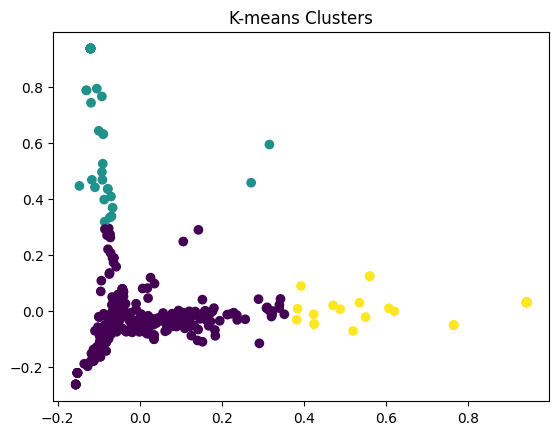

K-means:
Number of clusters: 3
Score: 0.03823311643713638


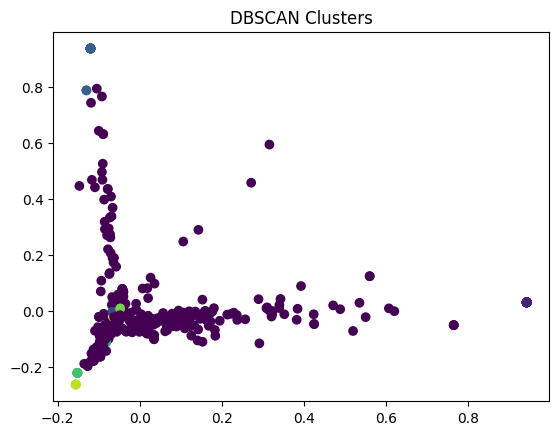


DBSCAN:
Number of clusters: 11
Number of noise points: 895


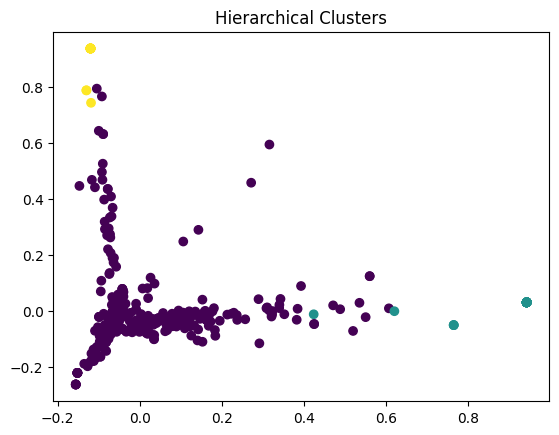


Hierarchical Clustering:
Number of clusters: 3
Score: 0.03384185668911446


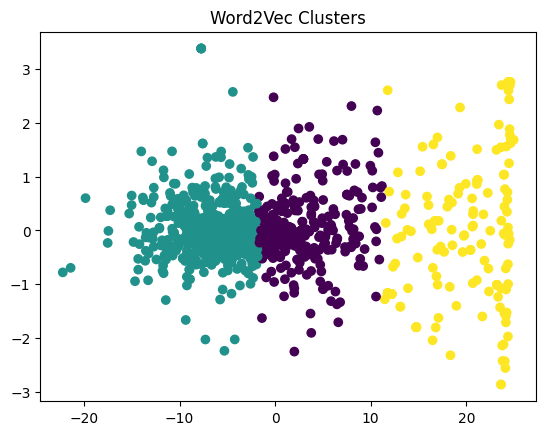


Word2Vec:
Number of clusters: 3
Score: 0.5672669


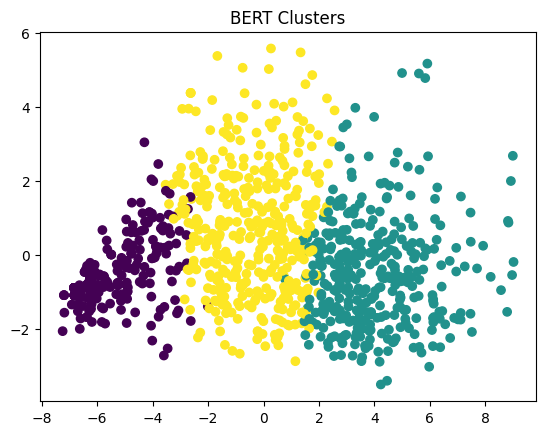


BERT:
Number of clusters: 3
Score: 0.13063079


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from gensim.models import Word2Vec
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the data
data_frame = pd.read_csv('Amazon_Unlocked_Mobile.csv')

# Remove missing values and select a subset for demo
data_frame = data_frame.dropna().sample(1000, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer_obj = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer_obj.fit_transform(data_frame['Reviews'])

# K-means clustering
kmeans_model = KMeans(n_clusters=3, random_state=42)
data_frame['KMeans_Cluster'] = kmeans_model.fit_predict(tfidf_matrix)

# DBSCAN clustering
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
data_frame['DBSCAN_Cluster'] = dbscan_model.fit_predict(tfidf_matrix)

# Hierarchical clustering
hierarchical_cluster_model = AgglomerativeClustering(n_clusters=3)
data_frame['Hierarchical_Cluster'] = hierarchical_cluster_model.fit_predict(tfidf_matrix.toarray())

# Word2Vec clustering
tokenized_reviews = [review.split() for review in data_frame['Reviews']]
word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)
word2vec_embeddings = np.array([np.mean([word2vec_model.wv[word] for word in words], axis=0) for words in tokenized_reviews])

# Standardize Word2Vec vectors for K-means
scaler_obj = StandardScaler()
scaled_word2vec_embeddings = scaler_obj.fit_transform(word2vec_embeddings)

# Apply K-means clustering on Word2Vec vectors
kmeans_word2vec_model = KMeans(n_clusters=3, random_state=42)
data_frame['Word2Vec_Cluster'] = kmeans_word2vec_model.fit_predict(scaled_word2vec_embeddings)

# BERT embeddings
tokenizer_obj = BertTokenizer.from_pretrained('bert-base-uncased')
model_obj = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embeddings(reviews):
    tokens = tokenizer_obj(reviews, return_tensors='pt', truncation=True, padding=True)
    with torch.no_grad():
        outputs = model_obj(**tokens)
    embeddings = outputs['last_hidden_state'][:, 0, :].numpy()
    return embeddings

bert_embeddings = np.vstack(data_frame['Reviews'].apply(get_bert_embeddings))

# Apply K-means clustering on BERT embeddings
kmeans_bert_model = KMeans(n_clusters=3, random_state=42)
data_frame['BERT_Cluster'] = kmeans_bert_model.fit_predict(bert_embeddings)

# Visualize clusters using PCA
def plot_clusters(embeddings, cluster_labels, title):
    pca_obj = PCA(n_components=2)
    pca_result = pca_obj.fit_transform(embeddings)

    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis')
    plt.title(title)
    plt.show()

# Plot clusters for K-means
plot_clusters(tfidf_matrix.toarray(), data_frame['KMeans_Cluster'], 'K-means Clusters')

# Print K-means results
print("K-means:")
print("Number of clusters:", len(np.unique(data_frame['KMeans_Cluster'])))
print("Score:", silhouette_score(tfidf_matrix, data_frame['KMeans_Cluster']))

# Plot clusters for DBSCAN
plot_clusters(tfidf_matrix.toarray(), data_frame['DBSCAN_Cluster'], 'DBSCAN Clusters')

# Print DBSCAN results
print("\nDBSCAN:")
print("Number of clusters:", len(np.unique(data_frame['DBSCAN_Cluster'])))
print("Number of noise points:", np.sum(data_frame['DBSCAN_Cluster'] == -1))

# Plot clusters for Hierarchical clustering
plot_clusters(tfidf_matrix.toarray(), data_frame['Hierarchical_Cluster'], 'Hierarchical Clusters')

# Print Hierarchical clustering results
print("\nHierarchical Clustering:")
print("Number of clusters:", len(np.unique(data_frame['Hierarchical_Cluster'])))
print("Score:", silhouette_score(tfidf_matrix, data_frame['Hierarchical_Cluster']))

# Plot clusters for Word2Vec
plot_clusters(scaled_word2vec_embeddings, data_frame['Word2Vec_Cluster'], 'Word2Vec Clusters')

# Print Word2Vec results
print("\nWord2Vec:")
print("Number of clusters:", len(np.unique(data_frame['Word2Vec_Cluster'])))
print("Score:", silhouette_score(scaled_word2vec_embeddings, data_frame['Word2Vec_Cluster']))

# Plot clusters for BERT
plot_clusters(bert_embeddings, data_frame['BERT_Cluster'], 'BERT Clusters')

# Print BERT results
print("\nBERT:")
print("Number of clusters:", len(np.unique(data_frame['BERT_Cluster'])))
print("Score:", silhouette_score(bert_embeddings, data_frame['BERT_Cluster']))

**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

.The comparison between clustering techniques and embedding models shows clear differences in how they perform on clustering data. K-means, with a score of 0.038, seems to do okay in forming three clusters, suggesting that the data might not have very distinct separations. On the other hand, DBSCAN identifies 11 clusters along with some noise points, indicating its adaptability to different densities and shapes in the data. Hierarchical clustering, scoring 0.034 with three clusters, follows a similar path to K-means but with a different approach to forming clusters. Conversely, Word2Vec and BERT embeddings score higher, indicating a better representation of semantic similarities in the data. Word2Vec performs the best with a score of 0.567, showing strong clustering performance, while BERT, with a score of 0.131, also captures semantic relationships, albeit to a lesser extent. In summary, this comparison highlights the importance of choosing the right technique or model depending on the data characteristics and desired outcomes, balancing between interpretability and performance.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



The tasks in this assignment gave me a thorough look at text classification techniques using different machine learning and deep learning models. They also covered training and evaluating classifiers such as Naive Bayes, SVM, K-NN, decision trees, random forests, XGBoost, Word2Vec, and BERT.